## STUDENT PERFORMANCE INDICATOR 

## Life cycle of machine learning project

1. Understanding the Problem Statment
2. Data Collection
3. Data Checks to perform
4. Exploraroty data analysis
5. Data Pre-Processing
6. Model Training
7. Chose Model to build

## Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

In [1]:
## IMPORT DATA AND IMPORTANAT PACAKAGES
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Import dataset in form of csv as pandasDataframe

In [2]:
data = pd.read_csv('stud.csv')
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
data.shape

(1000, 8)

## we have 1000 rows and 8 column of data

### Lets Understand the data
1. Gender :- Sex of Student
2. race_ethnicity :- ethnicity of students -> (Group A, B,C, D,E)
3. parental_level_of_education :- bachelor's degree
4. lunch :- having lunch before test (standard or free/reduced)
5. test_preparation_course :- complete or not complete before test
6. math_score, reading_score, writing_score :- 72,72,74

## 3. Data checks to perform
- check missing values
- check duplicates
- check data types
- check the number of uniques values of each column
- check statistics of data set
- Check various categories present in the different categorical column 

In [4]:
## 3.1 check missing values
data.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### there is no null values 

#### check there is no duplicate values in dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
data.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [7]:
### 3.5 Check statistics of data set
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


                                                  # Table for mean, std, min #

|            | math_score | reading_score | writing_score |
|------------|------------|---------------|---------------|
| mean       | 66.08900   | 69.169000     | 68.054000     |
| std        | 15.16308   | 14.600192     | 15.195657     |
| min        | 0.00000    | 7.000000      | 10.000000     |

In [8]:
## we will write a program so we can check cat type
print("Categories of gender are : ",end= " " )
print(data['gender'].unique())
print()

print("Categories of race_ethnicity are : ",end= " " )
print(data['race_ethnicity'].unique())
print()

print("Categories of parental_level_of_education are : ",end= " " )
print(data['parental_level_of_education'].unique())
print()

print("Categories of lunch are : ",end= " " )
print(data['lunch'].unique())
print()

print("Categories of test_preparation_course are : ",end= " " )
print(data['test_preparation_course'].unique())
print()

Categories of gender are :  ['female' 'male']

Categories of race_ethnicity are :  ['group B' 'group C' 'group A' 'group D' 'group E']

Categories of parental_level_of_education are :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories of lunch are :  ['standard' 'free/reduced']

Categories of test_preparation_course are :  ['none' 'completed']



In [9]:
## we will add one more columns as totalscore and Averge
data['total_score'] = data['math_score']+data['reading_score']+data['writing_score']
data['average'] = round((data['math_score']+data['reading_score']+data['writing_score'])/3, 2)


In [10]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [11]:
## now we will understand that how many student got full marks 
## how many student got less than 20 marks
reading_full = data[data['reading_score'] == 100]['average'].count()
writing_full = data[data['writing_score'] == 100]['average'].count()
math_full = data[data['math_score']== 100]['average'].count()

print(f'Number of student with full marks in maths, {math_full}')
print(f'Number of student with full marks in writing, {writing_full}')
print(f'Number of student with full marks in reading, {reading_full}')

Number of student with full marks in maths, 7
Number of student with full marks in writing, 14
Number of student with full marks in reading, 17


In [12]:
reading_less_20 = data[data['reading_score'] <= 20]['average'].count()
writing_less_20 = data[data['writing_score'] <= 20]['average'].count()
math_less_20 = data[data['math_score'] <= 20]['average'].count()

print(f'Number of student with full marks in maths, {reading_less_20}')
print(f'Number of student with full marks in writing, {writing_less_20}')
print(f'Number of student with full marks in reading, {math_less_20}')

Number of student with full marks in maths, 1
Number of student with full marks in writing, 3
Number of student with full marks in reading, 4


#### 4. Exploring Data (Visulization)
### 4.1 Visulization average score distrubution to make conclusion
- Histogram
- Keneral Distrubtion Function

#### 4.1.1 Histogram & KDE

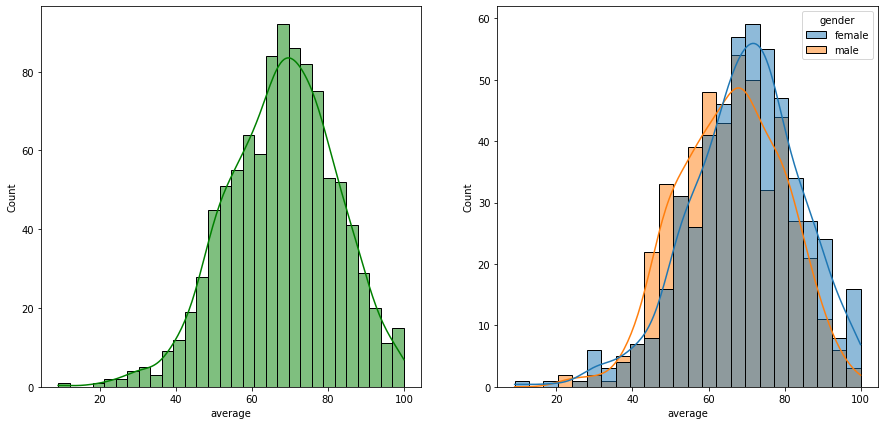

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sb.histplot(data=data,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sb.histplot(data=data,x='average',kde=True,hue='gender')
plt.show()

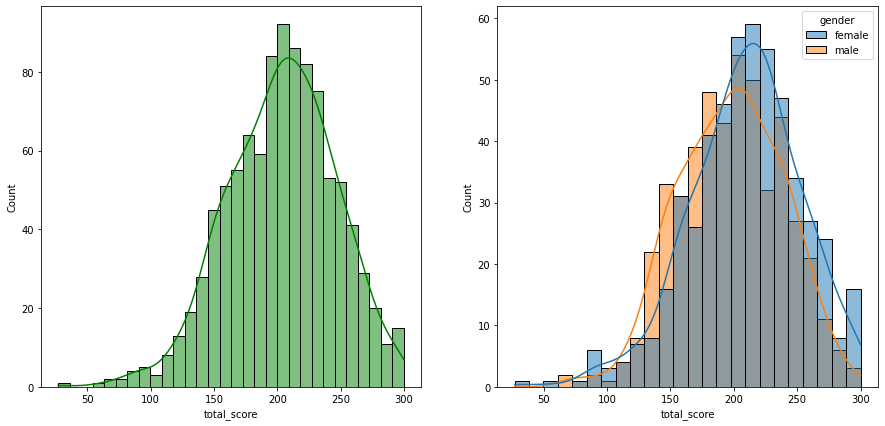

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sb.histplot(data=data,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sb.histplot(data=data,x='total_score',kde=True,hue='gender')
plt.show()

Insights 

- Females are performing better than males

<AxesSubplot: xlabel='average', ylabel='Count'>

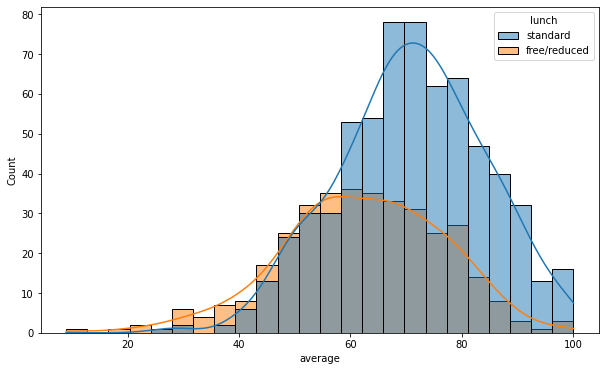

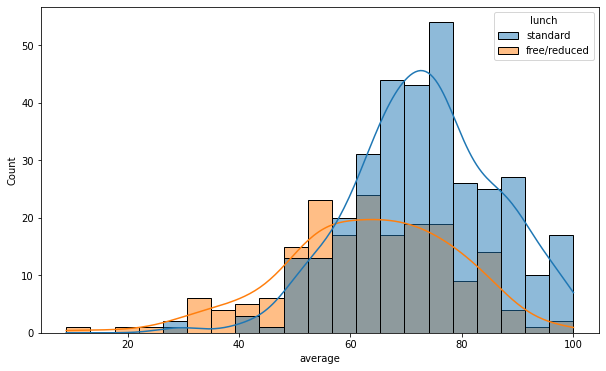

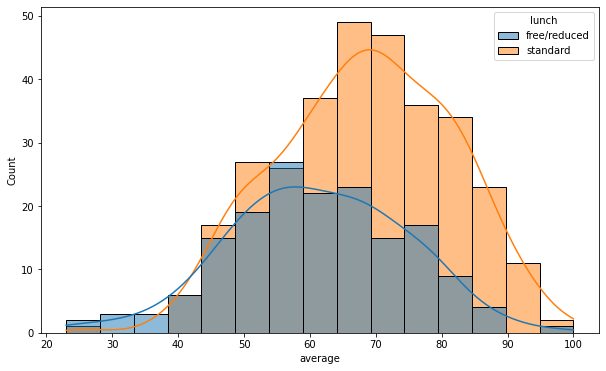

In [15]:
## we will now see how lunch affects performance of students
plt.subplots(1,figsize=(10,6))
sb.histplot(data = data, x = 'average', kde = True, hue = 'lunch')
plt.subplots(1,figsize=(10,6))
sb.histplot(data = data[data.gender == 'female'], x = 'average', kde = True, hue = 'lunch')
plt.subplots(1,figsize=(10,6))
sb.histplot(data = data[data.gender == 'male'], x = 'average', kde = True, hue = 'lunch')

Insigths

- from above graphs we can say that students who has taken standrad lunch scores well

<AxesSubplot: xlabel='average', ylabel='Count'>

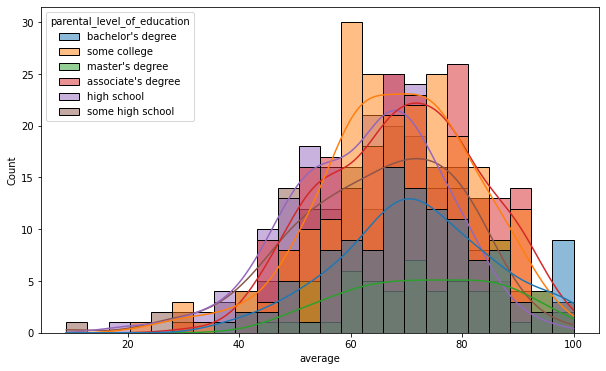

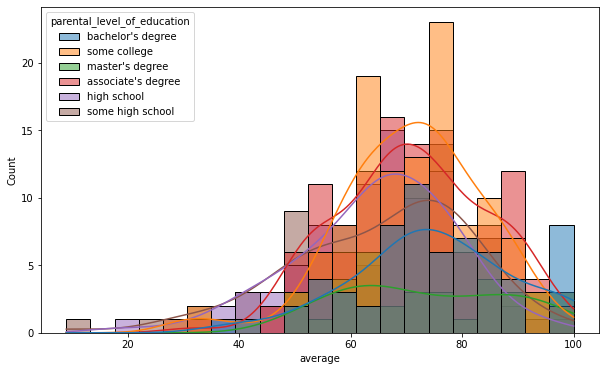

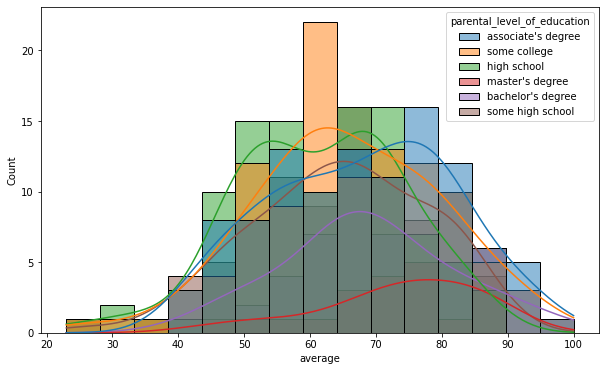

In [16]:
plt.subplots(1,figsize=(10,6))
sb.histplot(data = data, x = 'average', kde = True, hue = 'parental_level_of_education')
plt.subplots(1,figsize=(10,6))
sb.histplot(data = data[data.gender == 'female'], x = 'average', kde = True, hue = 'parental_level_of_education')
plt.subplots(1,figsize=(10,6))
sb.histplot(data = data[data.gender == 'male'], x = 'average', kde = True, hue = 'parental_level_of_education')

Insights

- here we can see parent level of education doesnt effect the student performcane
- parent have bachleors degree shows student peform well in exam
- w.r.t to male and female it is same

<AxesSubplot: xlabel='average', ylabel='Count'>

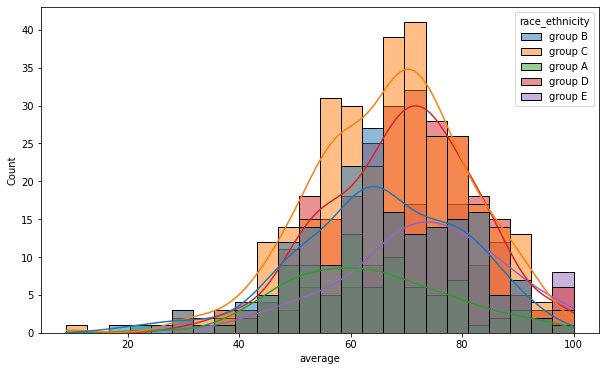

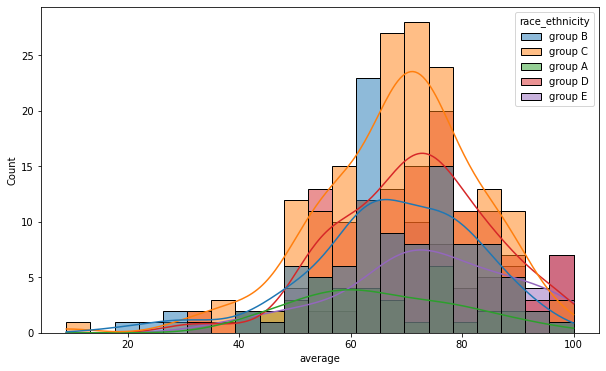

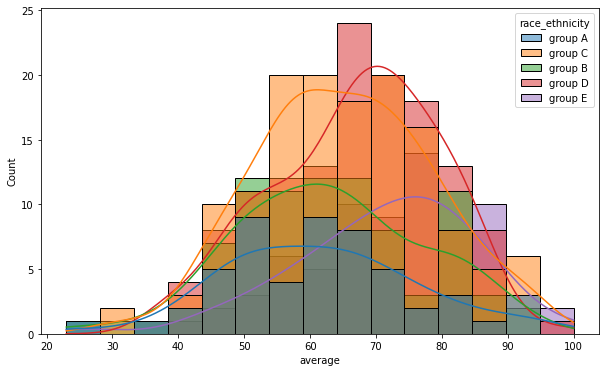

In [17]:
plt.subplots(1,figsize=(10,6))
sb.histplot(data = data, x = 'average', kde = True, hue = 'race_ethnicity')
plt.subplots(1,figsize=(10,6))
sb.histplot(data = data[data.gender == 'female'], x = 'average', kde = True, hue = 'race_ethnicity')
plt.subplots(1,figsize=(10,6))
sb.histplot(data = data[data.gender == 'male'], x = 'average', kde = True, hue = 'race_ethnicity')

Insigths

- Group A and B seen to be as an low performcane 
- Group C and D seen to be as high performance

<AxesSubplot: xlabel='average', ylabel='Count'>

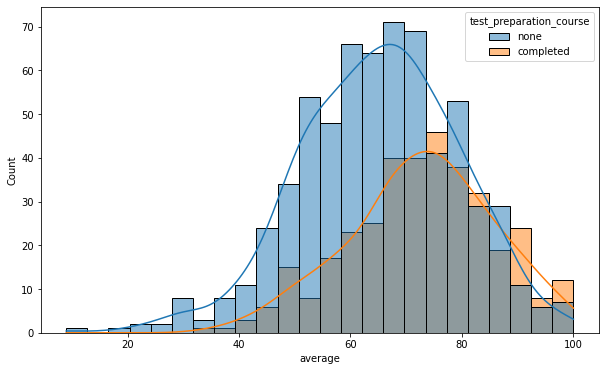

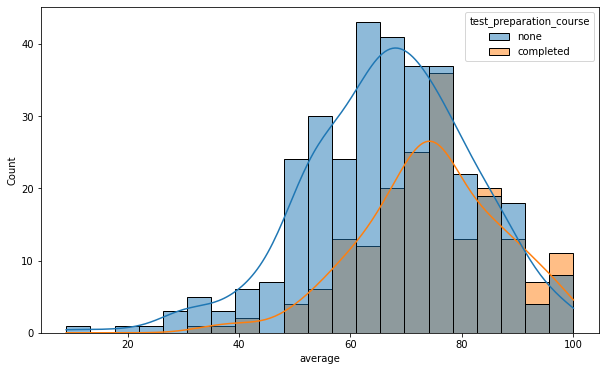

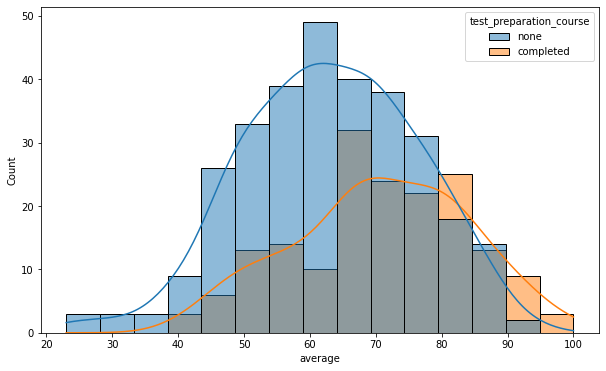

In [18]:
plt.subplots(1,figsize=(10,6))
sb.histplot(data = data, x = 'average', kde = True, hue = 'test_preparation_course')
plt.subplots(1,figsize=(10,6))
sb.histplot(data = data[data.gender == 'female'], x = 'average', kde = True, hue = 'test_preparation_course')
plt.subplots(1,figsize=(10,6))
sb.histplot(data = data[data.gender == 'male'], x = 'average', kde = True, hue = 'test_preparation_course')

Insights
- from above graphs student who has performed well completed test
- but we can see stdent who has not completed test scores betwen 60-75

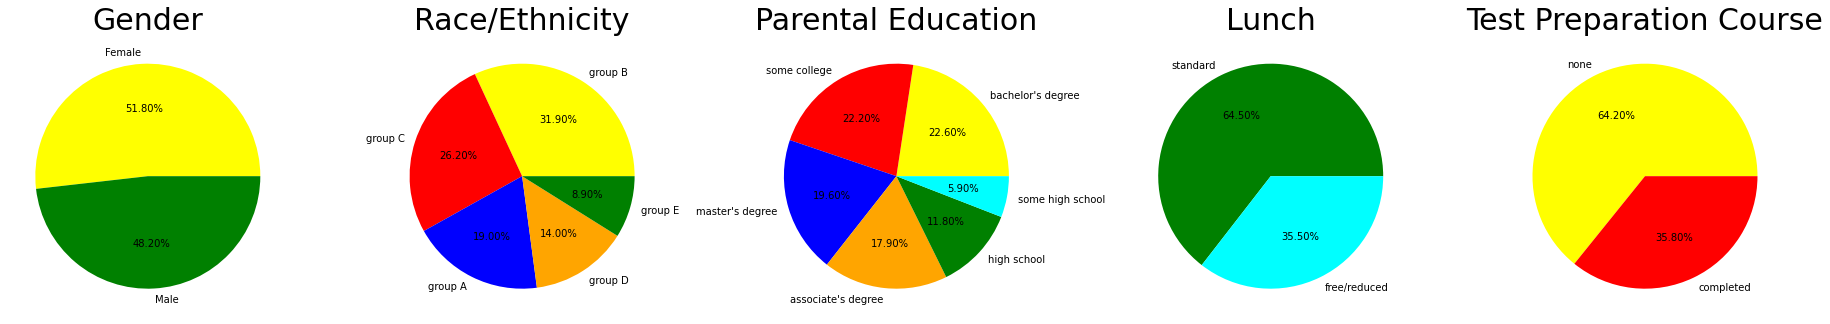

In [19]:
## Mutlivariate analysis
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 5, figsize=(25, 5))

# Gender
size = data['gender'].value_counts()
labels = ['Female', 'Male']
colors = ['yellow', 'green']

axs[0].pie(size, colors=colors, labels=labels, autopct="%.2f%%")
axs[0].set_title('Gender', fontsize=30)
axs[0].axis('off')

# Race/Ethnicity
size = data['race_ethnicity'].value_counts()
labels = ['group B', 'group C', 'group A', 'group D', 'group E']
colors = ['yellow', 'red', 'blue', 'orange', 'green']

axs[1].pie(size, colors=colors, labels=labels, autopct="%.2f%%")
axs[1].set_title('Race/Ethnicity', fontsize=30)
axs[1].axis('off')

# Parental Level of Education
size = data['parental_level_of_education'].value_counts()
labels = ["bachelor's degree", 'some college', "master's degree", "associate's degree",
          'high school', 'some high school']
colors = ['yellow', 'red', 'blue', 'orange', 'green', 'cyan']

axs[2].pie(size, colors=colors, labels=labels, autopct="%.2f%%")
axs[2].set_title('Parental Education', fontsize=30)
axs[2].axis('off')

# Lunch
size = data['lunch'].value_counts()
labels = ['standard', 'free/reduced']
colors = ['green', 'cyan']

axs[3].pie(size, colors=colors, labels=labels, autopct="%.2f%%")
axs[3].set_title('Lunch', fontsize=30)
axs[3].axis('off')

# Test Preparation Course
size = data['test_preparation_course'].value_counts()
labels = ['none', 'completed']
colors = ['yellow', 'red']

axs[4].pie(size, colors=colors, labels=labels, autopct="%.2f%%")
axs[4].set_title('Test Preparation Course', fontsize=30)
axs[4].axis('off')

plt.tight_layout()
plt.show()


Insigths-
- Gender looks like male and female are same
- Race/Ethnicity shows students are from group C
- 22% of the parental education are from some college
- 64.50% shows student have standrad lunch
- 64.20% shows student havent done courese preparation

## Featurewise Visulization

## 4.4.1 Gender Column
1. How is distribution of Gender ?
2. Is gender has any impact on student's performance ?

<AxesSubplot: xlabel='gender', ylabel='count'>

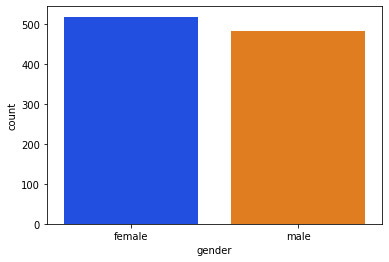

In [20]:
sb.countplot(x = data['gender'],palette ='bright')


Insights
- male and female are same

## BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [21]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


### Total average vs Math average marks of both genders

In [22]:
gender_group = data.groupby('gender').mean()
gender_group

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837303


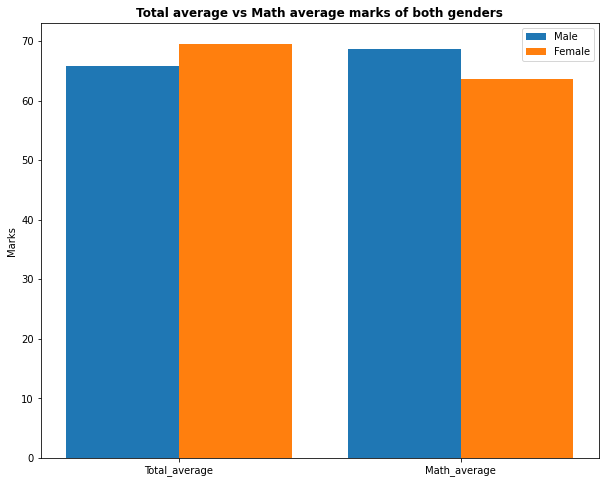

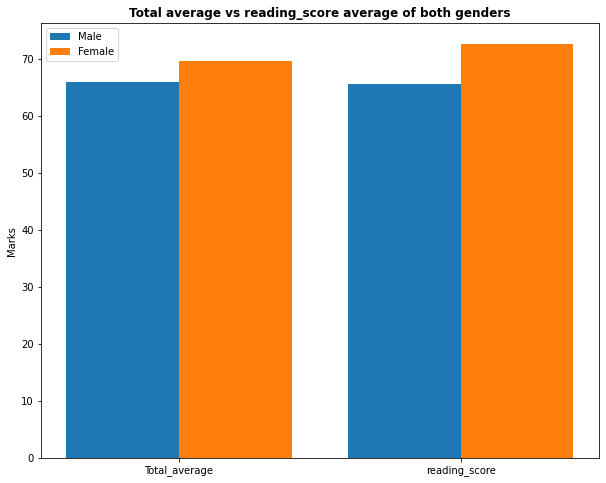

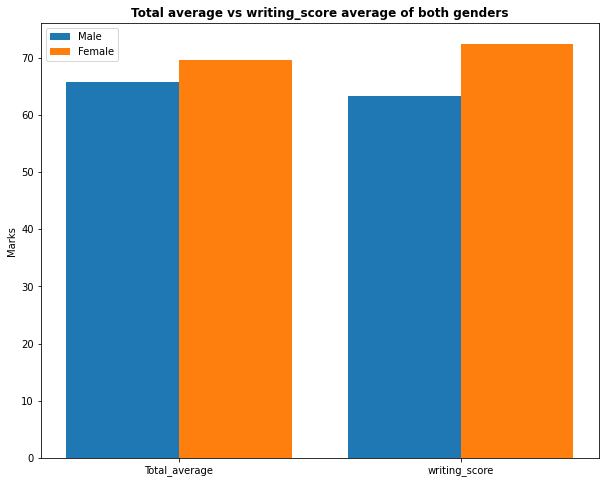

In [23]:
plt.figure(figsize=(10, 8))

X = ['Total_average', 'Math_average']

female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average vs Math average marks of both genders", fontweight='bold')
plt.legend()
plt.show()


plt.figure(figsize=(10, 8))

X = ['Total_average', 'reading_score']

female_scores = [gender_group['average'][0], gender_group['reading_score'][0]]
male_scores = [gender_group['average'][1], gender_group['reading_score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average vs reading_score average of both genders", fontweight='bold')
plt.legend()
plt.show()


plt.figure(figsize=(10, 8))

X = ['Total_average', 'writing_score']

female_scores = [gender_group['average'][0], gender_group['writing_score'][0]]
male_scores = [gender_group['average'][1], gender_group['writing_score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average vs writing_score average of both genders", fontweight='bold')
plt.legend()
plt.show()

Insights
- In Total average vs Math average marks of both genders, male students score well than female students
- Female have good marks in reading and writing score than female shows.

([<matplotlib.patches.Wedge at 0x264dfe4abe0>,
 [Text(0.6461719988148862, 1.0111685062083247, 'group C'),
  Text(-1.0461621742897658, 0.3399186742226879, 'group D'),
  Text(-0.49322154359063347, -0.9832255636109514, 'group B'),
  Text(0.5952333666001212, -0.9250390474384775, 'group E'),
  Text(1.057281962489778, -0.3035701760610943, 'group A')],
 [Text(0.3769336659753503, 0.5898482952881894, '31.9%'),
  Text(-0.5706339132489631, 0.18541018593964795, '26.2%'),
  Text(-0.2690299328676182, -0.5363048528787007, '19.0%'),
  Text(0.32467274541824787, -0.5045667531482604, '14.0%'),
  Text(0.5766992522671516, -0.1655837323969605, '8.9%')])

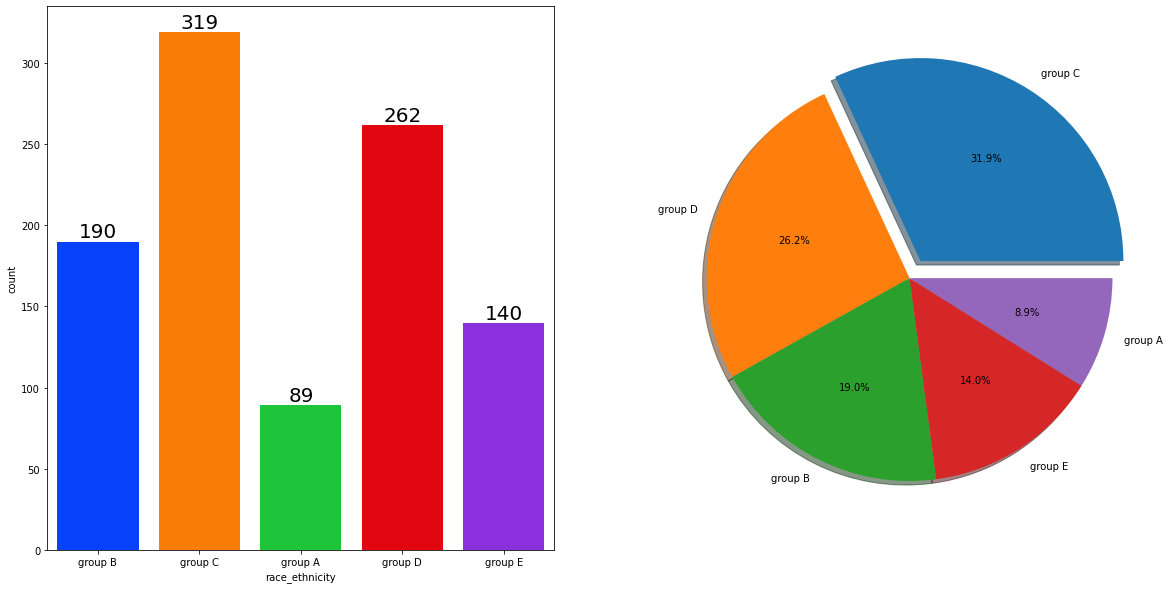

In [24]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sb.countplot(x=data['race_ethnicity'],data=data,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = data['race_ethnicity'].value_counts(),labels=data['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)   

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

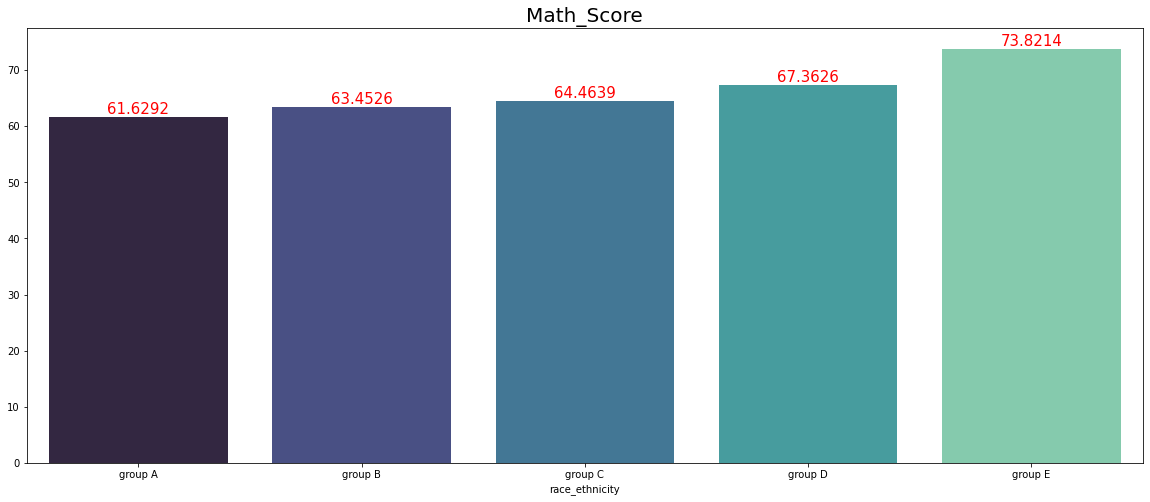

In [37]:
group_data_2 = data.groupby('race_ethnicity')
f, ax = plt.subplots(1,1, figsize = (20,8))
sb.barplot(x = group_data_2['math_score'].mean().index, y = group_data_2['math_score'].mean().values, palette='mako', ax=ax) 
ax.set_title('Math_Score', color = 'Black', size = 20)
for container in ax.containers:
    ax.bar_label(container, color = 'Red', size = 15)

In [44]:
group_data_2['math_score'].mean().values

array([61.62921348, 63.45263158, 64.46394984, 67.36259542, 73.82142857])

Insights
- what we have done on above code is, we grouped data by groupby for race_ethnicity 
then "group_data_2['math_score'].mean().index" as 'group A', 'group B', 'group C', 'group D', 'group E'
y = defines group_data_2['math_score'].mean().values as [61.62921348, 63.45263158, 64.46394984, 67.36259542, 73.82142857]

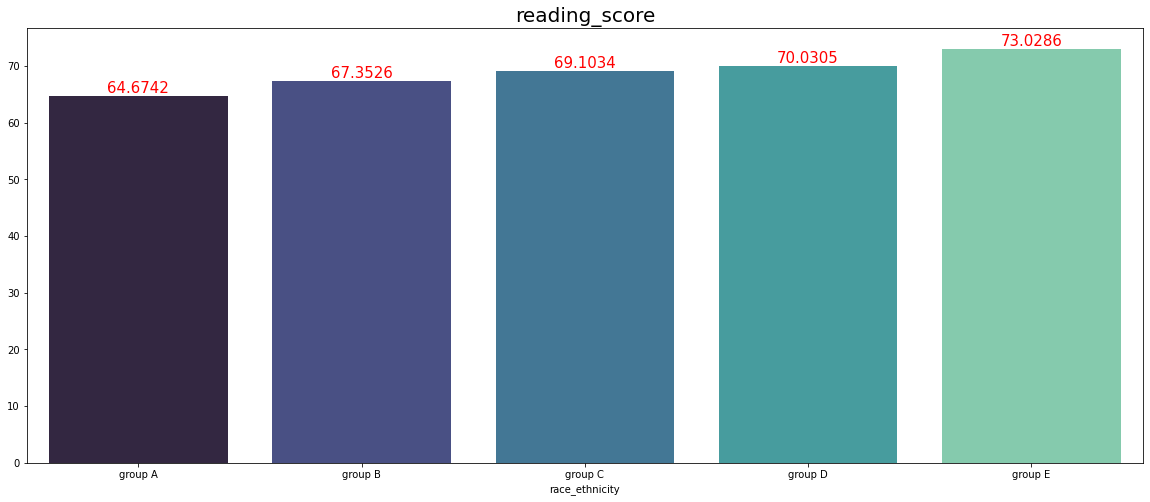

In [46]:
group_data_2 = data.groupby('race_ethnicity')
f, ax = plt.subplots(1,1, figsize = (20,8))
sb.barplot(x = group_data_2['reading_score'].mean().index, y = group_data_2['reading_score'].mean().values, palette='mako', ax=ax) 
ax.set_title('reading_score', color = 'Black', size = 20)
for container in ax.containers:
    ax.bar_label(container, color = 'Red', size = 15)

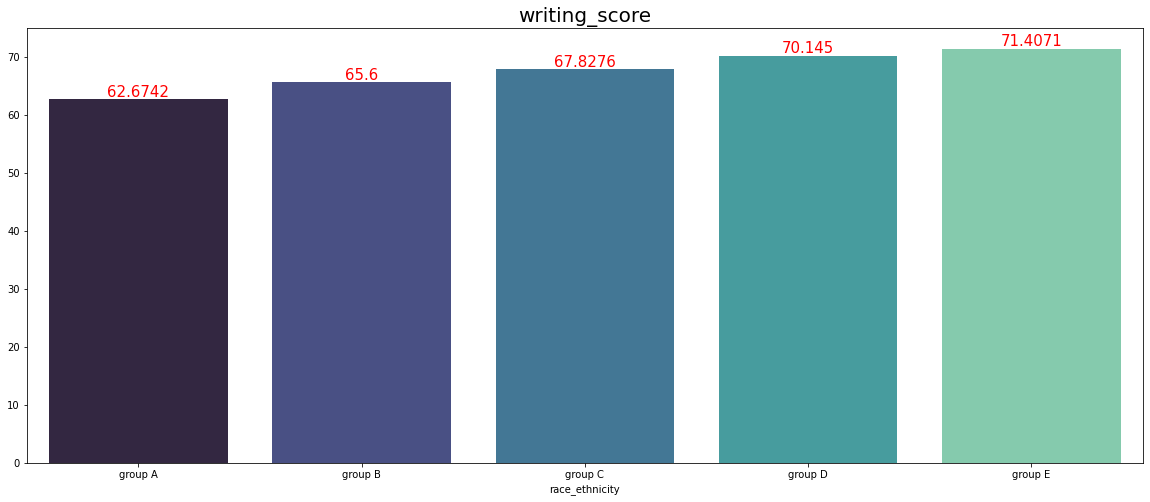

In [47]:
group_data_2 = data.groupby('race_ethnicity')
f, ax = plt.subplots(1,1, figsize = (20,8))
sb.barplot(x = group_data_2['writing_score'].mean().index, y = group_data_2['writing_score'].mean().values, palette='mako', ax=ax) 
ax.set_title('writing_score', color = 'Black', size = 20)
for container in ax.containers:
    ax.bar_label(container, color = 'Red', size = 15)

Insights for race_ethnicity vs scores
-Students from Group E has scorred maxium in both 3 test
-student from Group A has scored less
-Student group B, Group C and Group D has average score

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<AxesSubplot: xlabel='lunch', ylabel='writing_score'>

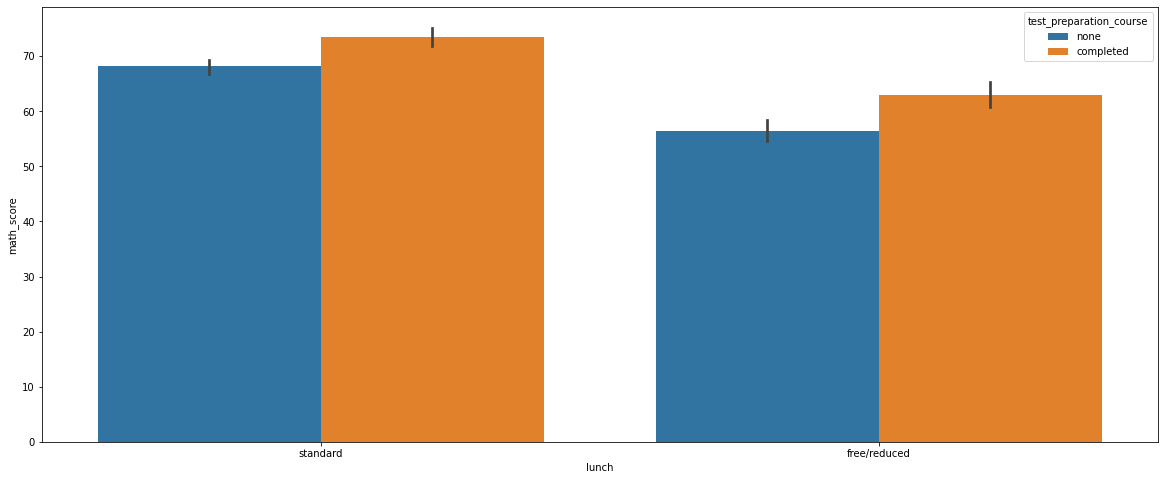

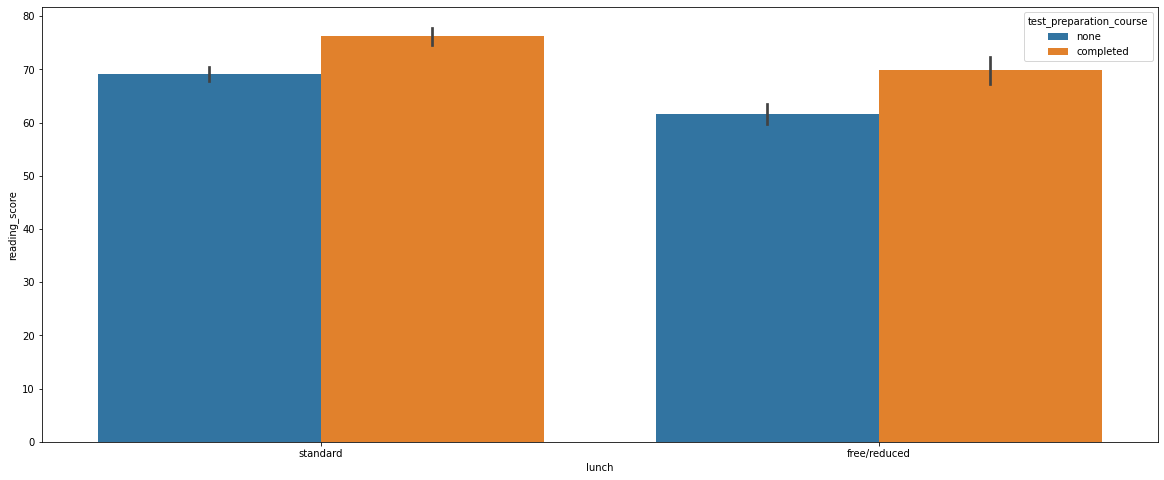

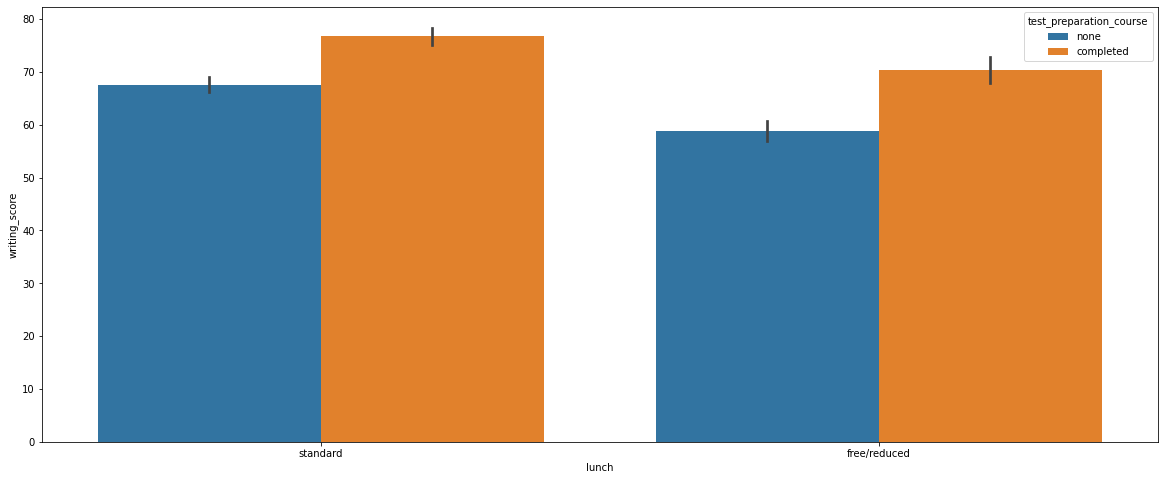

In [51]:
plt.subplots(1,1, figsize = (20,8))
sb.barplot(x = data['lunch'], y = data['math_score'], hue = data['test_preparation_course'])

plt.subplots(1,1, figsize = (20,8))
sb.barplot(x = data['lunch'], y = data['reading_score'], hue = data['test_preparation_course'])

plt.subplots(1,1, figsize = (20,8))
sb.barplot(x = data['lunch'], y = data['writing_score'], hue = data['test_preparation_course'])

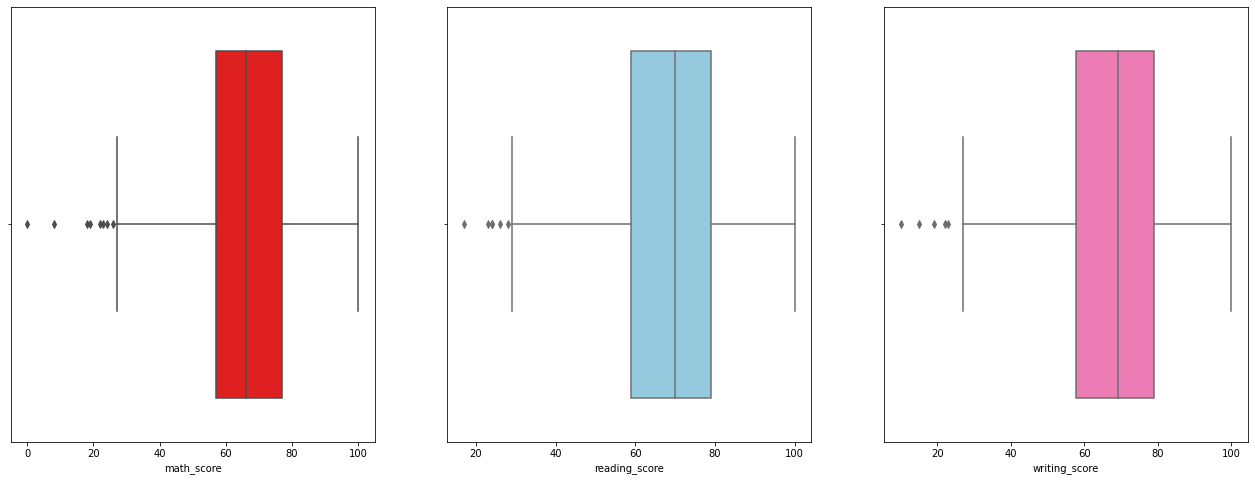

In [63]:
# Checking outliers
plt.subplots(1,3,figsize=(30,8))
plt.subplot(141)
sb.boxplot(data['math_score'], color = 'red')
plt.subplot(142)
sb.boxplot(data['reading_score'], color = 'skyblue')
plt.subplot(143)
sb.boxplot(data['writing_score'], color = 'hotpink')
plt.show()

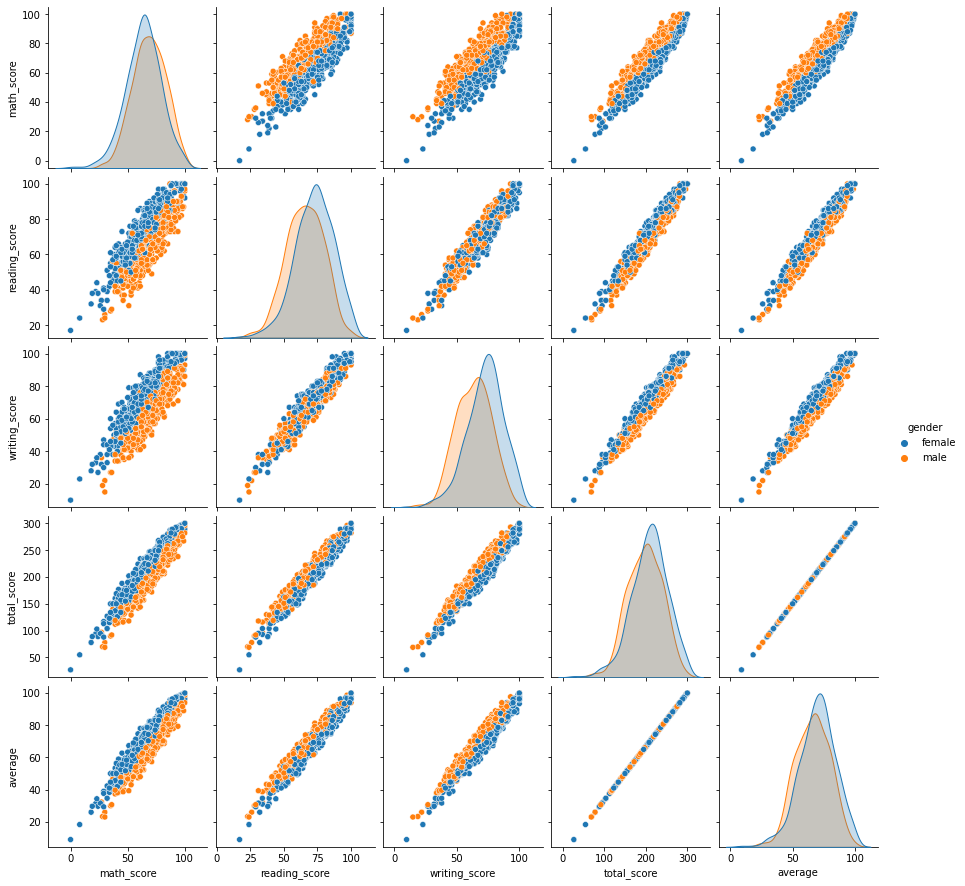

In [65]:
sb.pairplot(data,hue = 'gender')
plt.show()